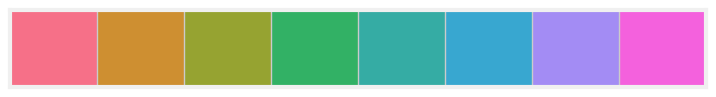

In [636]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))
import matplotlib.dates as mdates

In [546]:
data=pd.read_csv('/Users/stella/Desktop/data-2/Pagesor A_28Sep to 03Dec 2017_UTC+0.csv')

In [547]:
# PEGASOR URBAN FROM AIR MONITORS
urban=pd.read_csv('/Users/stella/Desktop/data-2/Pagesor A_28Sep to 03Dec 2017_UTC+0.csv',delimiter=',',encoding='latin-1')
#urban=data[['Alarm','Data','pegasor a','pegasor a.1','pegasor a.2','pegasor a.19','pegasor a.20','pegasor a.21','pegasor a.37','pegasor a.38','pegasor a.39']]
urban.columns=['alarm','data','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2','ldsa-3','pn-3','pm25-3']

urban=urban.iloc[7:].reset_index()
del urban['index']
urban.alarm=urban.alarm.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'))
urban.alarm[urban.data=='24:00']=urban.alarm[urban.data=='24:00']+timedelta(1)
urban.data[urban.data=='24:00']='00:00'
urban.alarm=urban.alarm.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))
urban['datetime']=urban.alarm + ' ' + urban.data
urban.datetime=urban.datetime.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M'))
del urban['alarm'], urban['data']

num=urban.drop(['datetime'], axis=1)
num=num.apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=1)
urban.loc[:, urban.columns != 'datetime']=num
#urban=urban.replace(0,np.nan)
num=urban._get_numeric_data()
num[num<=0]=np.nan
#urban[(num[num<=0]).any(1)]                            # CHECK DELETING NEGATIVES
#urban=urban.dropna()

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [548]:
tsi3783=pd.read_csv('/Users/stella/Desktop/data-2/TEOM_OCT1.csv')
tsi3783=tsi3783[['Date&Time','UF Aggregated Conc.']][1:-8].reset_index()
del tsi3783['index']
tsi3783['UF Aggregated Conc.']=tsi3783['UF Aggregated Conc.'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
tsi3783['Date&Time']=tsi3783['Date&Time'].apply(lambda x: parse(x))

In [549]:
tsi3031=pd.read_csv('/Users/stella/Desktop/data-2/TSI3031_20171001.TXT',delimiter='\t',skiprows=4)
tsi3031=tsi3031.reset_index()
tsi3031.columns=tsi3031.iloc[0]
tsi3031=tsi3031.iloc[1:].reset_index()
tsi3031['start']=tsi3031['start'].apply(lambda x: parse(x))
tsi3031['end']=tsi3031['end'].apply(lambda x: parse(x))
tsi3031=tsi3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]
tsi3031[['ch1','ch2','ch3','ch4','ch5','ch6']] = tsi3031[['ch1','ch2','ch3','ch4','ch5','ch6']].apply(pd.to_numeric)

In [550]:
teom=pd.read_csv('/Users/stella/Desktop/data-2/1405DF TEOM_1405A225741308_2017-12-4_10-36-42.csv')
teom=teom.reset_index()
teom=teom[['index','PM-2.5 FEM MC']]
teom.columns=['time','teom PM2.5']
teom['time']=teom['time'].apply(lambda x: parse(x))
teom=teom[teom['teom PM2.5']>0]

In [551]:
tsi3783_hr=tsi3783.set_index('Date&Time').resample(rule='1H').mean().reset_index()
tsi3783_daily=tsi3783.set_index('Date&Time').resample(rule='24H').mean().reset_index()

tsi3031_hr=tsi3031.set_index('start').resample(rule='1H').mean().reset_index()
tsi3031_daily=tsi3031.set_index('start').resample(rule='24H').mean().reset_index()

teom_hr=teom.set_index('time').resample(rule='1H').mean().reset_index()
teom_daily=teom.set_index('time').resample(rule='24H').mean().reset_index()

urb_hr=urban.set_index('datetime').resample(rule='1H').mean().reset_index()
urb_hr['datetime']=urb_hr['datetime'].apply(lambda x: x-timedelta(hours=5))
urb_daily=urban.set_index('datetime').resample(rule='24H').mean().reset_index()

In [564]:
df=tsi3783_hr.set_index('Date&Time').join(tsi3031_hr.set_index('start')).join(urb_hr.set_index('datetime')).join(teom_hr.set_index('time')).reset_index()
df.rename(columns = {'Date&Time':'time'}, inplace = True)
df_oct=df[df['time']<datetime.datetime(2017,11,1)]
df_nov=df[(df['time']>=datetime.datetime(2017,11,1))]

In [581]:
df2=tsi3783_daily.set_index('Date&Time').join(tsi3031_daily.set_index('start')).join(urb_daily.set_index('datetime')).join(teom_daily.set_index('time')).reset_index()
df2.rename(columns = {'Date&Time':'time'}, inplace = True)
df2_oct=df2[df2['time']<datetime.datetime(2017,11,1)]
df2_nov=df2[(df2['time']>=datetime.datetime(2017,11,1))]

In [567]:
pd.DataFrame.corr(df_oct)

,UF Aggregated Conc.,ch1,ch2,ch3,ch4,ch5,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3,teom PM2.5
UF Aggregated Conc.,1.000000,0.877247,0.676931,0.486567,0.377357,0.291888,0.204515,0.654814,0.654153,0.654123,0.654759,0.654645,0.654642,0.649329,0.649230,0.649226,0.205624
ch1,0.877247,1.000000,0.854607,0.591340,0.413582,0.322422,0.264550,0.730362,0.729838,0.729811,0.733706,0.733190,0.733193,0.730073,0.729620,0.729600,0.244009
ch2,0.676931,0.854607,1.000000,0.886669,0.688051,0.548419,0.527699,0.895971,0.895976,0.895992,0.898051,0.897555,0.897558,0.895059,0.894504,0.894480,0.449638
ch3,0.486567,0.591340,0.886669,1.000000,0.920656,0.752802,0.705874,0.936516,0.936930,0.936953,0.938270,0.938373,0.938372,0.935442,0.935347,0.935336,0.609952
ch4,0.377357,0.413582,0.688051,0.920656,1.000000,0.891959,0.712089,0.890676,0.891049,0.891044,0.892840,0.893347,0.893335,0.891559,0.891929,0.891942,0.674634
ch5,0.291888,0.322422,0.548419,0.752802,0.891959,1.000000,0.696677,0.817870,0.817801,0.817796,0.817280,0.817343,0.817328,0.823938,0.824191,0.824220,0.728526
ch6,0.204515,0.264550,0.527699,0.705874,0.712089,0.696677,1.000000,0.686123,0.686416,0.686468,0.685111,0.685106,0.685125,0.693444,0.693621,0.693619,0.660130
ldsa-1,0.654814,0.730362,0.895971,0.936516,0.890676,0.817870,0.686123,1.000000,0.999990,0.999989,0.997589,0.997534,0.997536,0.997252,0.997216,0.997214,0.654675
pn-1,0.654153,0.729838,0.895976,0.936930,0.891049,0.817801,0.686416,0.999990,1.000000,0.999999,0.997590,0.997547,0.997550,0.997180,0.997153,0.997151,0.654607
pm25-1,0.654123,0.729811,0.895992,0.936953,0.891044,0.817796,0.686468,0.999989,0.999999,1.000000,0.997588,0.997546,0.997548,0.997179,0.997151,0.997149,0.654599


In [568]:
pd.DataFrame.corr(df_nov)

,UF Aggregated Conc.,ch1,ch2,ch3,ch4,ch5,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3,teom PM2.5
UF Aggregated Conc.,1.000000,0.800516,0.619099,0.468594,0.362859,0.205282,0.250408,0.573190,0.572855,0.572793,0.576431,0.575828,0.575808,0.544609,0.543753,0.543821,0.160818
ch1,0.800516,1.000000,0.855099,0.628881,0.450755,0.253955,0.345912,0.671765,0.671524,0.671525,0.678960,0.678478,0.678487,0.659267,0.658626,0.658653,0.175197
ch2,0.619099,0.855099,1.000000,0.915297,0.726269,0.427503,0.575976,0.839095,0.838978,0.838970,0.844660,0.844362,0.844352,0.835519,0.835108,0.835120,0.354548
ch3,0.468594,0.628881,0.915297,1.000000,0.917308,0.625112,0.709870,0.911845,0.911862,0.911858,0.916991,0.917000,0.916982,0.917023,0.916917,0.916928,0.537089
ch4,0.362859,0.450755,0.726269,0.917308,1.000000,0.844393,0.739375,0.923123,0.923211,0.923220,0.929266,0.929576,0.929570,0.934690,0.934814,0.934817,0.710377
ch5,0.205282,0.253955,0.427503,0.625112,0.844393,1.000000,0.703551,0.798785,0.798850,0.798878,0.800115,0.800425,0.800431,0.811106,0.811346,0.811319,0.838213
ch6,0.250408,0.345912,0.575976,0.709870,0.739375,0.703551,1.000000,0.762663,0.762334,0.762356,0.759820,0.759548,0.759551,0.767000,0.766906,0.766876,0.724210
ldsa-1,0.573190,0.671765,0.839095,0.911845,0.923123,0.798785,0.762663,1.000000,0.999984,0.999983,0.998280,0.998295,0.998297,0.996564,0.996536,0.996550,0.707524
pn-1,0.572855,0.671524,0.838978,0.911862,0.923211,0.798850,0.762334,0.999984,1.000000,0.999999,0.998184,0.998219,0.998221,0.996472,0.996464,0.996478,0.707404
pm25-1,0.572793,0.671525,0.838970,0.911858,0.923220,0.798878,0.762356,0.999983,0.999999,1.000000,0.998183,0.998219,0.998221,0.996475,0.996468,0.996482,0.707442


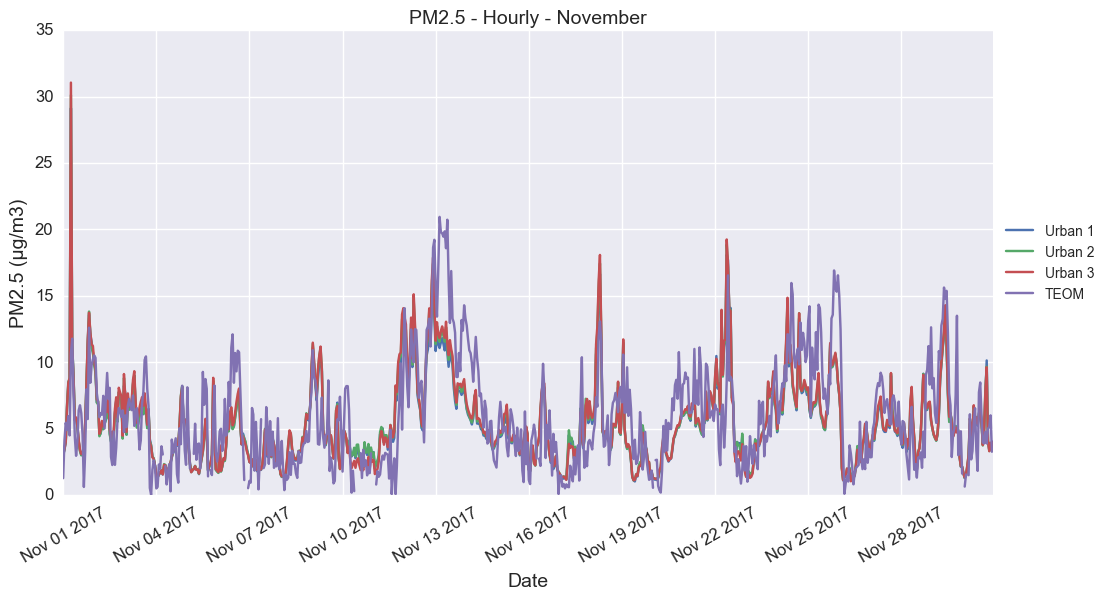

In [588]:
calib=df_oct['teom PM2.5'].mean()/df_oct['pm25-3'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_nov['time'],df_nov['pm25-1']*calib,label='Urban 1')
plt.plot(df_nov['time'],df_nov['pm25-2']*calib,label='Urban 2')
plt.plot(df_nov['time'],df_nov['pm25-3']*calib,label='Urban 3')
plt.plot(df_nov['time'],df_nov['teom PM2.5'],label='TEOM')
plt.title('PM2.5 - Hourly - November',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (µg/m3)',fontsize=14)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

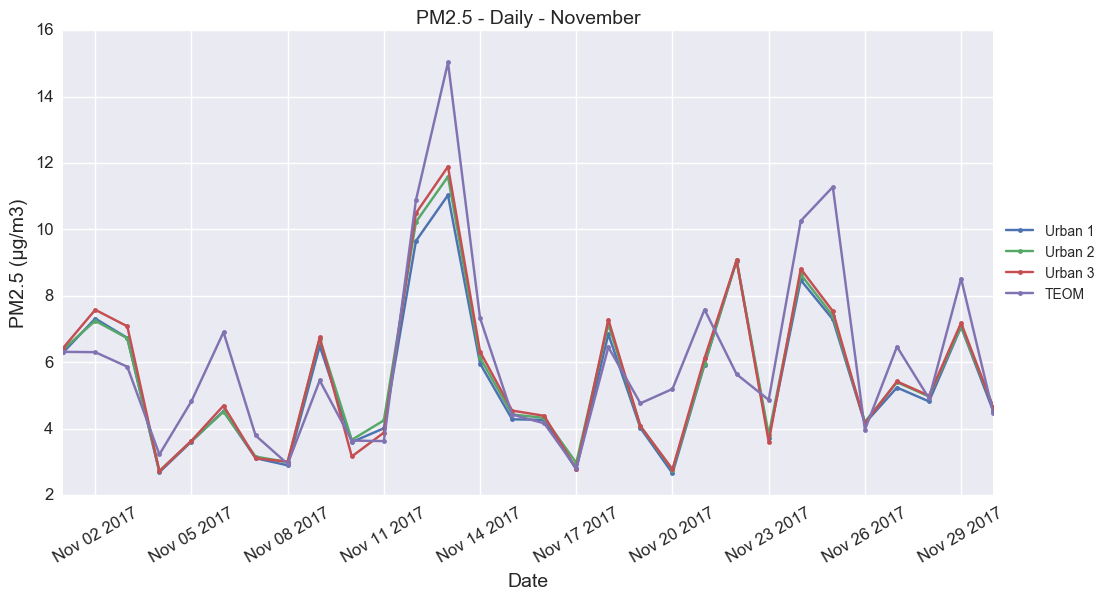

In [589]:
calib=df2_oct['teom PM2.5'].mean()/df2_oct['pm25-3'].mean()

plt.figure(figsize=(12,6))
plt.plot(df2_nov['time'],df2_nov['pm25-1']*calib,'.-',label='Urban 1')
plt.plot(df2_nov['time'],df2_nov['pm25-2']*calib,'.-',label='Urban 2')
plt.plot(df2_nov['time'],df2_nov['pm25-3']*calib,'.-',label='Urban 3')
plt.plot(df2_nov['time'],df2_nov['teom PM2.5'],'.-',label='TEOM')
plt.title('PM2.5 - Daily - November',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (µg/m3)',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

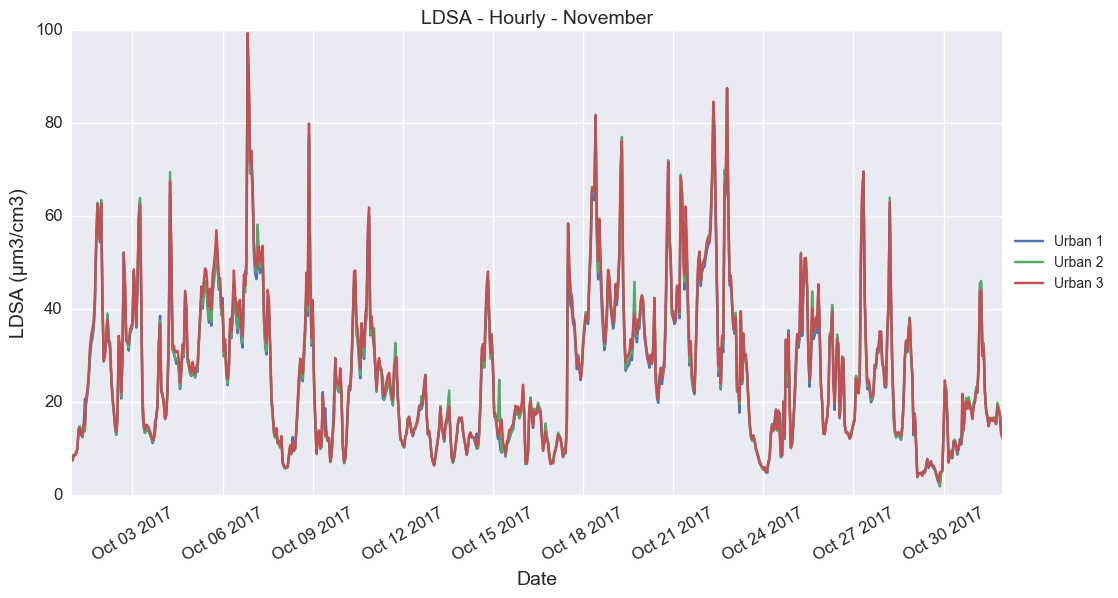

In [590]:
plt.figure(figsize=(12,6))
plt.plot(df_oct['time'],df_oct['ldsa-1'],label='Urban 1')
plt.plot(df_oct['time'],df_oct['ldsa-2'],label='Urban 2')
plt.plot(df_oct['time'],df_oct['ldsa-3'],label='Urban 3')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('LDSA - Hourly - November',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('LDSA (µm3/cm3)',fontsize=14)

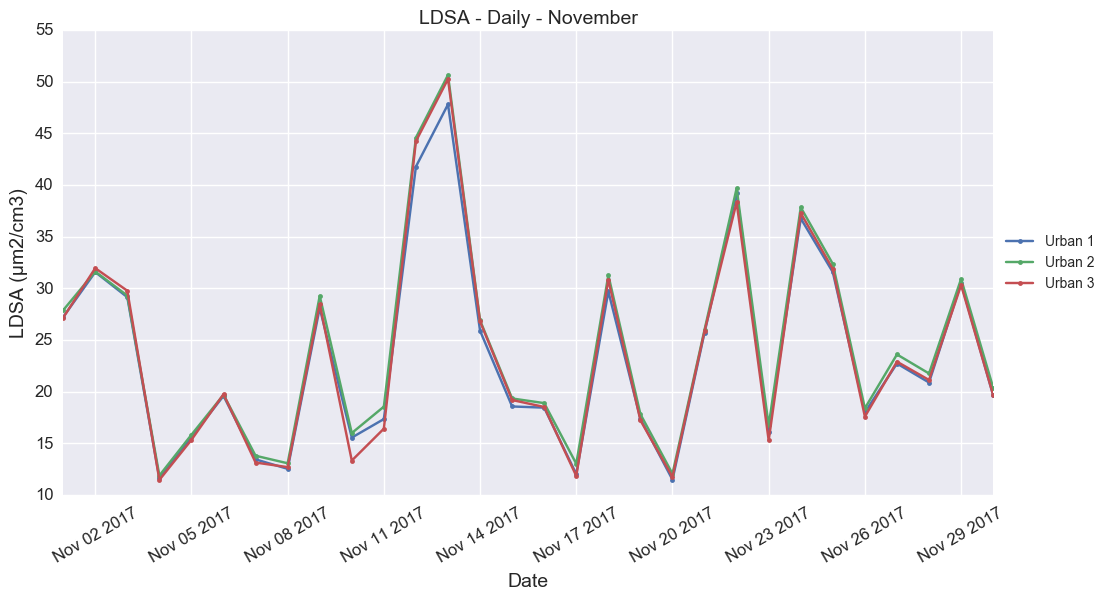

In [591]:
plt.figure(figsize=(12,6))
plt.plot(df2_nov['time'],df2_nov['ldsa-1'],'.-',label='Urban 1')
plt.plot(df2_nov['time'],df2_nov['ldsa-2'],'.-',label='Urban 2')
plt.plot(df2_nov['time'],df2_nov['ldsa-3'],'.-',label='Urban 3')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('LDSA - Daily - November', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('LDSA (µm2/cm3)',fontsize=14)

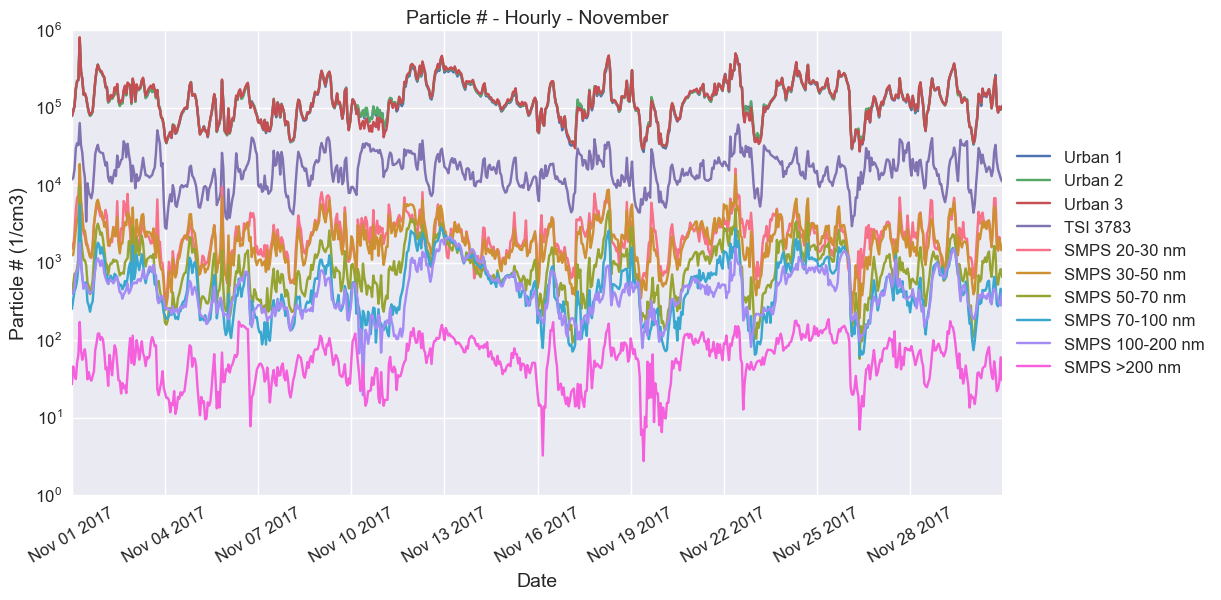

In [592]:
plt.figure(figsize=(12,6))
plt.semilogy(df_nov['time'],df_nov['pn-1'],label='Urban 1')
plt.semilogy(df_nov['time'],df_nov['pn-2'],label='Urban 2')
plt.semilogy(df_nov['time'],df_nov['pn-3'],label='Urban 3')
plt.semilogy(df_nov['time'],df_nov['UF Aggregated Conc.'],label='TSI 3783')
plt.semilogy(df_nov['time'],df_nov['ch1'],color=colorz[0],label='SMPS 20-30 nm')
plt.semilogy(df_nov['time'],df_nov['ch2'],color=colorz[1],label='SMPS 30-50 nm')
plt.semilogy(df_nov['time'],df_nov['ch3'],color=colorz[2],label='SMPS 50-70 nm')
plt.semilogy(df_nov['time'],df_nov['ch4'],color=colorz[5],label='SMPS 70-100 nm')
plt.semilogy(df_nov['time'],df_nov['ch5'],color=colorz[6],label='SMPS 100-200 nm')
plt.semilogy(df_nov['time'],df_nov['ch6'],color=colorz[7],label='SMPS >200 nm')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=12)
plt.title('Particle # - Hourly - November', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Particle # (1/cm3)',fontsize=14)

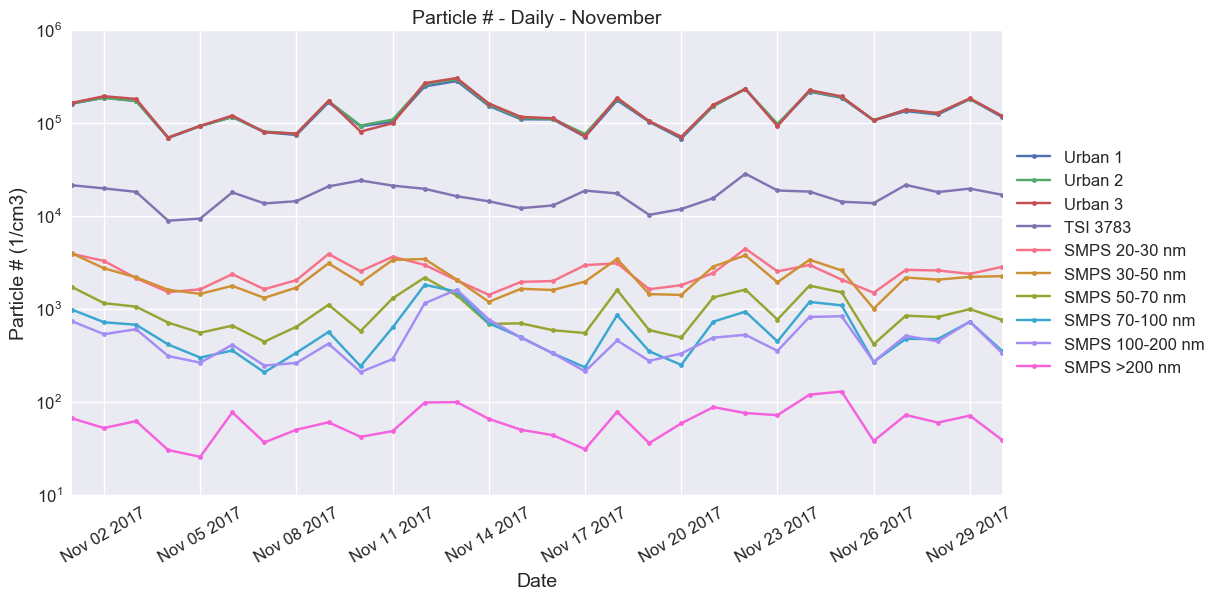

In [587]:
plt.figure(figsize=(12,6))
plt.semilogy(df2_nov['time'],df2_nov['pn-1'],'.-',label='Urban 1')
plt.semilogy(df2_nov['time'],df2_nov['pn-2'],'.-',label='Urban 2')
plt.semilogy(df2_nov['time'],df2_nov['pn-3'],'.-',label='Urban 3')
plt.semilogy(df2_nov['time'],df2_nov['UF Aggregated Conc.'],'.-',label='TSI 3783')
plt.semilogy(df2_nov['time'],df2_nov['ch1'],'.-',color=colorz[0],label='SMPS 20-30 nm')
plt.semilogy(df2_nov['time'],df2_nov['ch2'],'.-',color=colorz[1],label='SMPS 30-50 nm')
plt.semilogy(df2_nov['time'],df2_nov['ch3'],'.-',color=colorz[2],label='SMPS 50-70 nm')
plt.semilogy(df2_nov['time'],df2_nov['ch4'],'.-',color=colorz[5],label='SMPS 70-100 nm')
plt.semilogy(df2_nov['time'],df2_nov['ch5'],'.-',color=colorz[6],label='SMPS 100-200 nm')
plt.semilogy(df2_nov['time'],df2_nov['ch6'],'.-',color=colorz[7],label='SMPS >200 nm')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), fontsize=12)
plt.title('Particle # - Daily - November', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Particle # (1/cm3)',fontsize=14)

In [662]:
pd.DataFrame.corr(df2_oct)

,UF Aggregated Conc.,ch1,ch2,ch3,ch4,ch5,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3,teom PM2.5
UF Aggregated Conc.,1.000000,0.915930,0.655514,0.491967,0.446615,0.386674,0.153003,0.495104,0.494394,0.494280,0.492066,0.492300,0.492285,0.492578,0.492920,0.492866,0.265115
ch1,0.915930,1.000000,0.864445,0.699773,0.615826,0.556693,0.321832,0.613229,0.612368,0.612263,0.609259,0.609188,0.609184,0.611285,0.611138,0.611059,0.419326
ch2,0.655514,0.864445,1.000000,0.941528,0.841288,0.755313,0.600944,0.754311,0.753900,0.753882,0.753202,0.753051,0.753072,0.754657,0.754106,0.754044,0.614042
ch3,0.491967,0.699773,0.941528,1.000000,0.959813,0.849556,0.703906,0.847512,0.847442,0.847450,0.849474,0.849538,0.849569,0.849834,0.849461,0.849437,0.716931
ch4,0.446615,0.615826,0.841288,0.959813,1.000000,0.917892,0.693955,0.901758,0.901677,0.901668,0.904737,0.904942,0.904972,0.905526,0.905455,0.905459,0.772516
ch5,0.386674,0.556693,0.755313,0.849556,0.917892,1.000000,0.719710,0.869611,0.869087,0.869076,0.868435,0.868082,0.868113,0.875840,0.875571,0.875576,0.850516
ch6,0.153003,0.321832,0.600944,0.703906,0.693955,0.719710,1.000000,0.622383,0.622280,0.622327,0.626048,0.625604,0.625640,0.638759,0.638644,0.638638,0.783648
ldsa-1,0.495104,0.613229,0.754311,0.847512,0.901758,0.869611,0.622383,1.000000,0.999995,0.999995,0.999400,0.999305,0.999304,0.999215,0.999175,0.999174,0.738723
pn-1,0.494394,0.612368,0.753900,0.847442,0.901677,0.869087,0.622280,0.999995,1.000000,1.000000,0.999443,0.999354,0.999353,0.999192,0.999153,0.999152,0.738177
pm25-1,0.494280,0.612263,0.753882,0.847450,0.901668,0.869076,0.622327,0.999995,1.000000,1.000000,0.999444,0.999354,0.999353,0.999191,0.999152,0.999151,0.738112


In [661]:
pd.DataFrame.corr(df_oct)

,UF Aggregated Conc.,ch1,ch2,ch3,ch4,ch5,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3,teom PM2.5
UF Aggregated Conc.,1.000000,0.877247,0.676931,0.486567,0.377357,0.291888,0.204515,0.654814,0.654153,0.654123,0.654759,0.654645,0.654642,0.649329,0.649230,0.649226,0.205624
ch1,0.877247,1.000000,0.854607,0.591340,0.413582,0.322422,0.264550,0.730362,0.729838,0.729811,0.733706,0.733190,0.733193,0.730073,0.729620,0.729600,0.244009
ch2,0.676931,0.854607,1.000000,0.886669,0.688051,0.548419,0.527699,0.895971,0.895976,0.895992,0.898051,0.897555,0.897558,0.895059,0.894504,0.894480,0.449638
ch3,0.486567,0.591340,0.886669,1.000000,0.920656,0.752802,0.705874,0.936516,0.936930,0.936953,0.938270,0.938373,0.938372,0.935442,0.935347,0.935336,0.609952
ch4,0.377357,0.413582,0.688051,0.920656,1.000000,0.891959,0.712089,0.890676,0.891049,0.891044,0.892840,0.893347,0.893335,0.891559,0.891929,0.891942,0.674634
ch5,0.291888,0.322422,0.548419,0.752802,0.891959,1.000000,0.696677,0.817870,0.817801,0.817796,0.817280,0.817343,0.817328,0.823938,0.824191,0.824220,0.728526
ch6,0.204515,0.264550,0.527699,0.705874,0.712089,0.696677,1.000000,0.686123,0.686416,0.686468,0.685111,0.685106,0.685125,0.693444,0.693621,0.693619,0.660130
ldsa-1,0.654814,0.730362,0.895971,0.936516,0.890676,0.817870,0.686123,1.000000,0.999990,0.999989,0.997589,0.997534,0.997536,0.997252,0.997216,0.997214,0.654675
pn-1,0.654153,0.729838,0.895976,0.936930,0.891049,0.817801,0.686416,0.999990,1.000000,0.999999,0.997590,0.997547,0.997550,0.997180,0.997153,0.997151,0.654607
pm25-1,0.654123,0.729811,0.895992,0.936953,0.891044,0.817796,0.686468,0.999989,0.999999,1.000000,0.997588,0.997546,0.997548,0.997179,0.997151,0.997149,0.654599


In [603]:
teom=pd.read_csv('/Users/stella/Desktop/data-2/1405DF TEOM_1405A225741308_2017-12-4_10-36-42.csv')
teom=teom.reset_index()
teom=teom[['index','PM-2.5 FEM MC']]
teom.columns=['time','teom PM2.5']
teom['time']=teom['time'].apply(lambda x: parse(x))
#teom=teom[teom['teom PM2.5']>0]

In [606]:
test=teom[teom['teom PM2.5']>0]

In [ ]:
pos_pm=teom.copy()
neg_pm=teom.copy()

pos_pm['teom PM2.5'][pos_pm['teom PM2.5'] <= 0] = np.nan
neg_pm['teom PM2.5'][neg_pm['teom PM2.5'] > 0] = np.nan

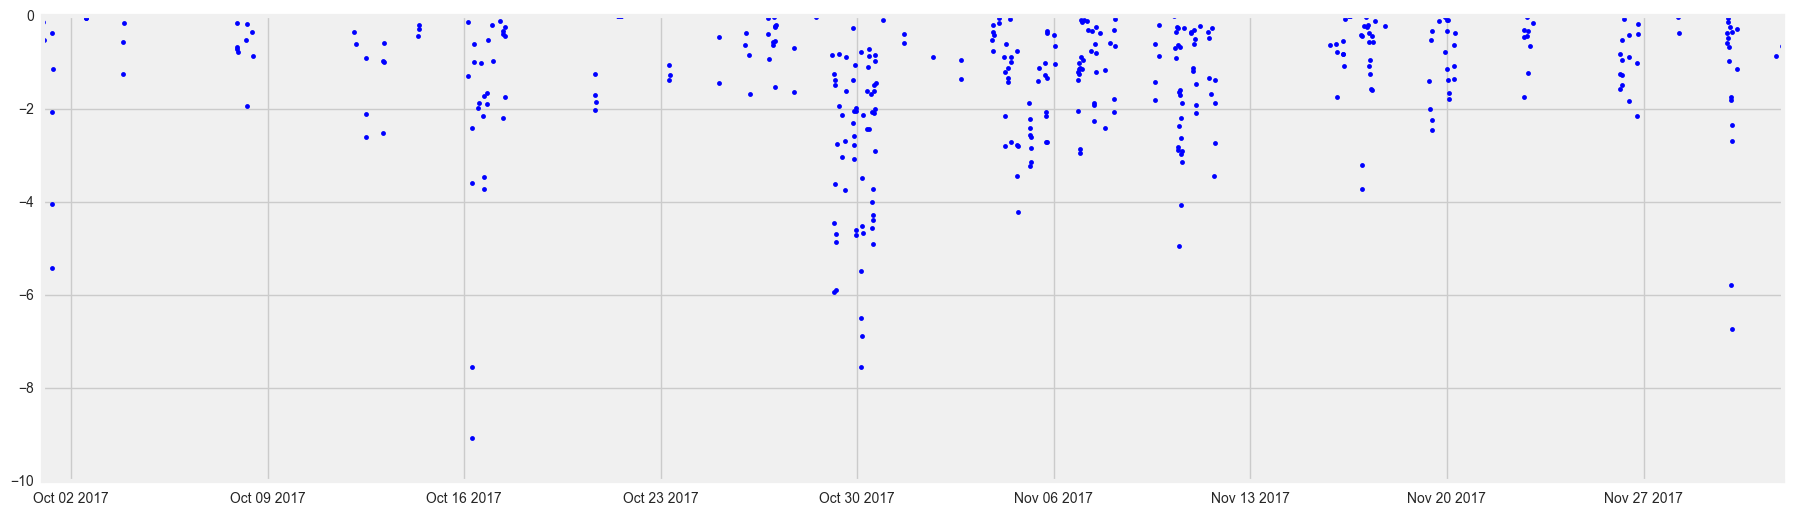

In [652]:
plt.figure(figsize=(20,6))

#plt.plot(pos_pm['time'], pos_pm['teom PM2.5'], 'r.')
plt.plot(neg_pm['time'], neg_pm['teom PM2.5'], 'b.')

In [653]:
neg_pm.dropna()

,time,teom PM2.5
1,2017-10-01 00:15:22,-0.126512
2,2017-10-01 00:30:21,-0.520045
29,2017-10-01 07:15:21,-0.363045
30,2017-10-01 07:30:22,-2.059380
31,2017-10-01 07:45:21,-5.420550
32,2017-10-01 08:00:22,-4.046580
33,2017-10-01 08:15:22,-1.132630
146,2017-10-02 12:30:21,-0.043995
147,2017-10-02 12:45:22,-0.040641
274,2017-10-03 20:30:22,-1.239320


In [650]:
len(pos_pm.dropna())

5788

In [649]:
len(neg_pm.dropna())

394

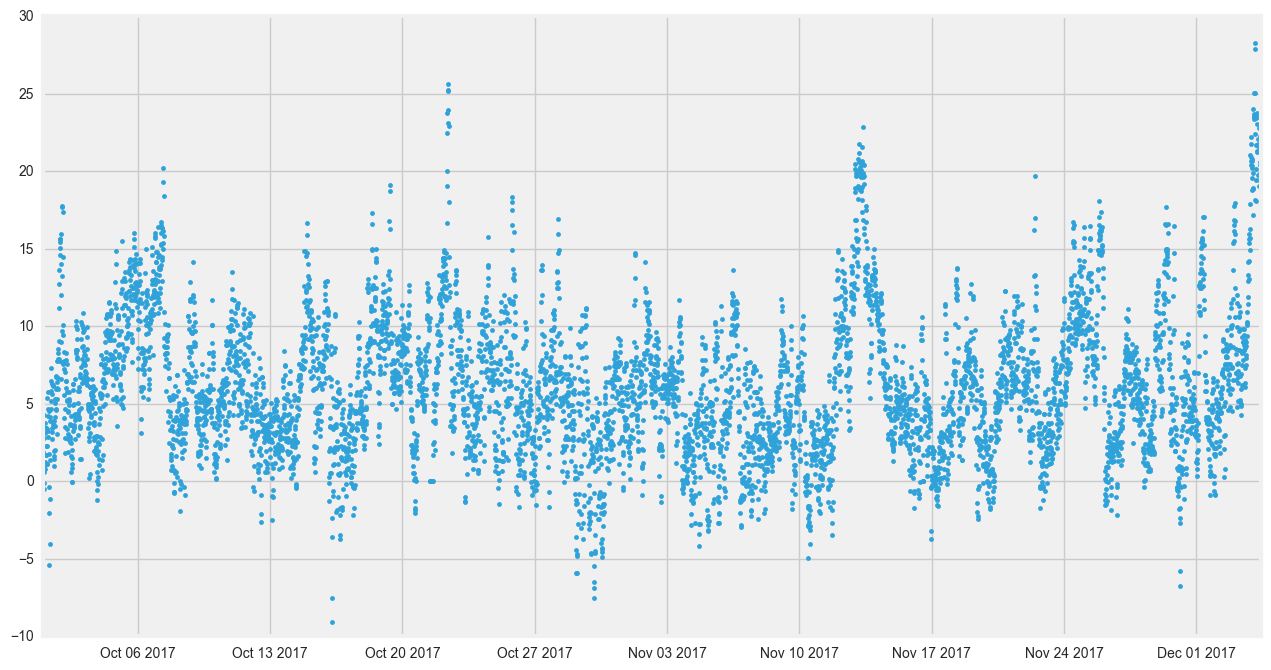

In [644]:
plt.figure(figsize=(14,8))
plt.plot(teom['time'],teom['teom PM2.5'],'.')